# Simple Linear Regression 

A regressão linear é um método estatístico utilizado para modelar a relação entre uma variável dependente (ou variável alvo) e uma ou mais variáveis independentes (ou variáveis preditoras).

A variável que você deseja prever é chamada de variável dependente, e a variável que você está utilizando para prever o valor da outra variável é chamada de variável independente.

O objetivo é encontrar uma linha reta que melhor ajuste os dados, minimizando a distância entre os pontos de dados e a linha, ou seja, regressão linear assume que o relacionamento entre duas variáveis, x e y, pode ser modelado por uma linha reta dada pela equação a seguir:

*y=β0+β1x*

- Link do dataset: https://www.geeksforgeeks.org/dataset-for-linear-regression/

### Load the libraries and data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

data = pd.read_csv("dataset/Salary_Data[1].csv")
sns.set()

### Simple data view and info

In [5]:
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [7]:
data.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


### Simple cleaning

In [8]:
data["Years of Experience"].isnull().sum().sum()

3

In [10]:
data.dropna(inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


### Data Exploration

In [12]:
# Dependent variable
y = data["Salary"]
# Independent variable
x1 = data["Years of Experience"]

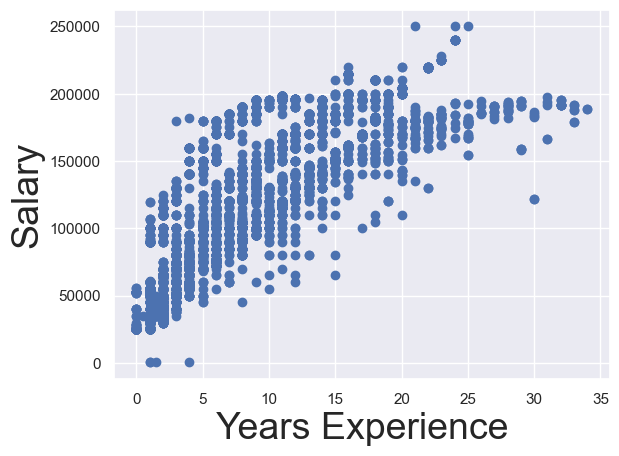

In [ ]:
# First we put the horizontal axis, then the vertical axis
plt.scatter(x1, y)
# Plotting and naming the axes
plt.xlabel("Years Experience", fontsize=27)
plt.ylabel("Salary", fontsize=27)
plt.show()

### Regression

In [13]:
# Add a constant
x = sm.add_constant(x1)
# using OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                 1.268e+04
Date:                Wed, 12 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:45:08   Log-Likelihood:                -78780.
No. Observations:                6698   AIC:                         1.576e+05
Df Residuals:                    6696   BIC:                         1.576e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.828e+04    632.785     92.108      0.000     5.7e+04    5.95e+04
Years of Experience  7046.7345     62.577    112.608      0.000    6924.063    7169.406
==============================================================================
Omnibus:                      223.085   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.654
Skew:                           0.432   Prob(JB):                     2.26e-55
Kurtosis:                       3.392   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plot the regression line 

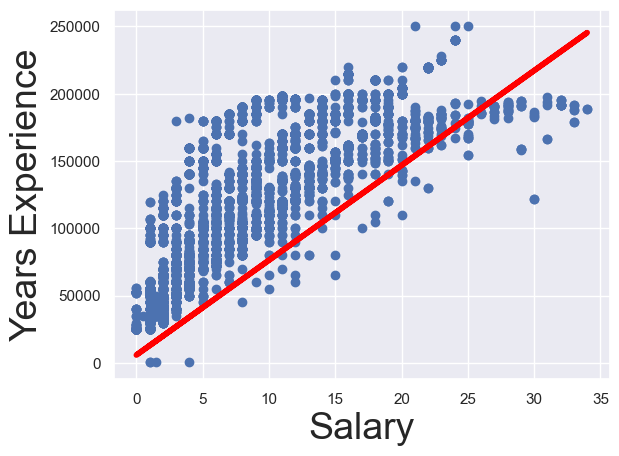

In [14]:
plt.scatter(x1, y)
yhat = x1 * 7046.7345 + 5828
fig = plt.plot(x1,yhat, lw=4, c='red', label ='regression line')
plt.xlabel("Salary", fontsize=27)
plt.ylabel("Years Experience", fontsize=27)
plt.show()